In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
def make_query(query, filepath='database.sqlite'):
    """
    Execute a query on a SQLite database file and return the results as a pandas DataFrame.

    Parameters
    ----------
    query : str
        SQL query to be executed on the database file.
    filepath : str, optional
        Path to the database file, by default 'database.sqlite'.

    Returns
    -------
    pd.DataFrame
        A pandas DataFrame containing the results of the executed query.
    """
    with sqlite3.connect(filepath) as connection:
        cursor = connection.cursor()
        execution = cursor.execute(query)
        result = pd.DataFrame(execution.fetchall(), columns=[i[0] for i in execution.description])
        return result

In [3]:
player_attributes = make_query(""" SELECT * FROM player_attributes """)
player = make_query(""" SELECT * FROM player """)
match = make_query(""" SELECT * FROM match """)
team = make_query(""" SELECT * FROM team """)
team_attributes = make_query(""" SELECT * FROM team_attributes """)
league = make_query(""" SELECT * FROM league """)
country = make_query(""" SELECT * FROM country """)

In [4]:
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
match[['home_team_goal', 'away_team_goal']].isna().sum()

home_team_goal    0
away_team_goal    0
dtype: int64

In [6]:
result = []
for row in match.itertuples():
    if row.home_team_goal == row.away_team_goal:
        result.append('draw')
    elif row.home_team_goal > row.away_team_goal:
        result.append('win')
    else:
        result.append('defeat')
result

['draw',
 'draw',
 'defeat',
 'win',
 'defeat',
 'draw',
 'draw',
 'defeat',
 'win',
 'win',
 'defeat',
 'defeat',
 'draw',
 'draw',
 'defeat',
 'defeat',
 'defeat',
 'defeat',
 'defeat',
 'draw',
 'draw',
 'win',
 'draw',
 'defeat',
 'draw',
 'win',
 'defeat',
 'draw',
 'draw',
 'draw',
 'draw',
 'win',
 'draw',
 'win',
 'win',
 'win',
 'win',
 'win',
 'defeat',
 'win',
 'win',
 'defeat',
 'draw',
 'win',
 'defeat',
 'win',
 'win',
 'win',
 'win',
 'defeat',
 'draw',
 'win',
 'draw',
 'win',
 'win',
 'defeat',
 'win',
 'defeat',
 'win',
 'win',
 'win',
 'win',
 'win',
 'defeat',
 'win',
 'win',
 'draw',
 'draw',
 'win',
 'defeat',
 'win',
 'defeat',
 'win',
 'win',
 'draw',
 'win',
 'win',
 'draw',
 'win',
 'draw',
 'win',
 'win',
 'win',
 'defeat',
 'defeat',
 'win',
 'win',
 'win',
 'draw',
 'defeat',
 'win',
 'defeat',
 'defeat',
 'win',
 'win',
 'win',
 'draw',
 'defeat',
 'defeat',
 'win',
 'draw',
 'win',
 'win',
 'win',
 'win',
 'win',
 'win',
 'draw',
 'defeat',
 'defeat',
 'd

In [7]:
match['Result'] = result
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,draw
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,draw
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,defeat
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,win
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,defeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [8]:
import matplotlib.pyplot as plt

match['Result_numeric'] = match['Result'].replace({'win' : 3, 'draw' : 2, 'defeat' : 1})

abs(match.corr()['Result_numeric']).sort_values(ascending=False)[:50]


Result_numeric     1.000000
away_team_goal     0.633354
home_team_goal     0.623921
IWH                0.345489
GBH                0.344490
BWH                0.342613
BSH                0.341196
B365H              0.339154
SJH                0.338271
LBH                0.336915
WHH                0.336912
IWA                0.335944
GBA                0.332362
BWA                0.329992
VCH                0.328746
B365A              0.326964
BSA                0.326516
PSH                0.325458
SJA                0.323179
PSA                0.320963
LBA                0.320836
WHA                0.319363
VCA                0.308906
IWD                0.180743
BSD                0.178217
SJD                0.177571
GBD                0.177100
B365D              0.172472
BWD                0.172095
WHD                0.171835
PSD                0.168000
VCD                0.167169
LBD                0.166351
home_player_11     0.045152
home_player_5      0.041094
home_player_2      0

In [9]:
def add_attributes(data=match, attribute='overall_rating'):
    """
    Add player rating attributes to a dataset based on player attributes dataset.

    Parameters
    ----------
    data : pd.DataFrame, optional
        The match dataset to add player rating attributes to. By default match.
    attribute : str, optional
        The player attribute to use for calculating the player rating, by default 'overall_rating'.

    Returns
    -------
    pd.DataFrame
        A copy of the original match dataset with added player rating attributes.
    """
    player_columns = ['home_player_' + str(i) for i in range(1, 12)] + ['away_player_' + str(i) for i in range(1, 12)]
    player_ratings = round(player_attributes.groupby('player_api_id')[attribute].mean(), 0)

    for column in player_columns:
        rating_column = column + '_rating'
        data[rating_column] = data[column].apply(lambda x: player_ratings[x] if not np.isnan(x) else np.nan)
    
    return data

In [10]:
match = add_attributes()
match['Result'] = result
match['Result_numeric'] = match['Result'].replace({'win' : 3, 'draw' : 2, 'defeat' : 1})

match
display(match)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result,Result_numeric,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,draw,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,draw,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,defeat,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3

In [11]:
abs(match.corr()['Result_numeric']).sort_values(ascending=False)[:50]


Result_numeric           1.000000
away_team_goal           0.633354
home_team_goal           0.623921
IWH                      0.345489
GBH                      0.344490
BWH                      0.342613
BSH                      0.341196
B365H                    0.339154
SJH                      0.338271
LBH                      0.336915
WHH                      0.336912
IWA                      0.335944
GBA                      0.332362
BWA                      0.329992
VCH                      0.328746
B365A                    0.326964
BSA                      0.326516
PSH                      0.325458
SJA                      0.323179
PSA                      0.320963
LBA                      0.320836
WHA                      0.319363
VCA                      0.308906
IWD                      0.180743
BSD                      0.178217
SJD                      0.177571
GBD                      0.177100
home_player_8_rating     0.175259
home_player_4_rating     0.175051
B365D         

In [12]:
def team_ratings(data=match, season='2014/2015', attribute='overall_rating'):
    """
    Calculates the average attribute ratings.
    
    Parameters
    ----------
    data : pd.DataFrame, optional
        A DataFrame containing the match data, with columns 'home_team_api_id', 'away_team_api_id', and 'season' and by default match.
    season : str, optional
        The season for which to calculate the team ratings, in the format 'yyyy/yyyy' and by default '20014/2015'.
    attribute : str, optional
        The name of the attribute to use for the team ratings, by default 'overall_rating'.
        
    Returns
    -------
    pd.DataFrame
        A DataFrame containing the team names and their attribute ratings for the given season.
    """
    home_ratings = data.groupby(['home_team_api_id']).mean().iloc[:, -22:-11].mean(axis=1)
    away_ratings = data.groupby('away_team_api_id').mean().iloc[:, -11:].mean(axis=1)
  
    ratings = pd.concat([home_ratings, away_ratings], axis=1).mean(axis=1).reset_index()
    
    return pd.merge(team[['team_api_id', 'team_long_name']], ratings, left_on='team_api_id', right_on='index').drop(['index'], axis=1).rename(columns={0 : attribute})
 

In [13]:
ratings = team_ratings(data=match)


In [14]:
ratings

,team_api_id,team_long_name,overall_rating
0,9987,KRC Genk,68.905732
1,9993,Beerschot AC,66.085793
2,10000,SV Zulte-Waregem,66.020104
3,9994,Sporting Lokeren,67.031469
4,9984,KSV Cercle Brugge,64.899389
...,...,...,...
294,10190,FC St. Gallen,61.347716
295,10191,FC Thun,61.377230
296,9777,Servette FC,59.686211
297,7730,FC Lausanne-Sports,60.743607


In [15]:
match_ = pd.merge(match, ratings, left_on='home_team_api_id', right_on='team_api_id').rename(columns={'overall_rating' : 'home_rating'})
test = pd.merge(match_, ratings, left_on='away_team_api_id', right_on='team_api_id').rename(columns={'overall_rating' : 'away_rating'})

In [16]:
abs(test.corr()['Result_numeric']).sort_values(ascending=False)[:50]
#test[['home_rating', 'away_rating']].apply(lambda x  : print(x))

Result_numeric           1.000000
away_team_goal           0.633354
home_team_goal           0.623921
IWH                      0.345489
GBH                      0.344490
BWH                      0.342613
BSH                      0.341196
B365H                    0.339154
SJH                      0.338271
LBH                      0.336915
WHH                      0.336912
IWA                      0.335944
GBA                      0.332362
BWA                      0.329992
VCH                      0.328746
B365A                    0.326964
BSA                      0.326516
PSH                      0.325458
SJA                      0.323179
PSA                      0.320963
LBA                      0.320836
WHA                      0.319363
VCA                      0.308906
IWD                      0.180743
BSD                      0.178217
SJD                      0.177571
GBD                      0.177100
home_player_8_rating     0.175259
home_player_4_rating     0.175051
B365D         

In [17]:
test

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Result,Result_numeric,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating,team_api_id_x,team_long_name_x,home_rating,team_api_id_y,team_long_name_y,away_rating
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.0,1.65,3.4,4.50,1.78,3.25,4.00,1.73,3.4,4.2,draw,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9987,KRC Genk,68.905732,9993,Beerschot AC,66.085793
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,37937.0,39498.0,104411.0,148314.0,148313.0,9307.0,38435.0,43158.0,38794.0,169200.0,163674.0,13131.0,37988.0,36849.0,36845.0,38322.0,38371.0,38784.0,36868.0,38786.0,30910.0,33622.0,None,None,None,None,None,None,None,None,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.40,4.0,1.80,3.3,4.00,1.90,3.25,3.75,1.83,3.3,3.8,draw,2,65.0,70.0,67.0,70.0,61.0,65.0,70.0,68.0,66.0,79.0,61.0,66.0,70.0,64.0,64.0,64.0,70.0,65.0,64.0,68.0,70.0,67.0,9987,KRC Genk,68.905732,9993,Beerschot AC,66.085793
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,1,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,3.0,4.0,7.0,1.0,2.0,4.0,6.0,8.0,1.0,3.0,5.0,7.0,9.0,5.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,170323.0,38785.0,38293.0,43158.0,148314.0,32863.0,39498.0,104411.0,169200.0,42153.0,38782.0,13131.0,37988.0,36849.0,38322.0,38800.0,38371.0,38784.0,36868.0,38786.0,200631.0,36852.0,None,None,None,None,None,None,None,None,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.30,3.8,1.80,3.3,3.80,1.95,3.25,3.50,NaN,NaN,NaN,win,3,77.0,66.0,71.0,68.0,70.0,72.0,70.0,67.0,79.0,72.0,72.0,66.0,70.0,64.0,64.0,66.0,70.0,65.0,64.0,68.0,54.0

In [18]:
test['differnce_rating'] = test['home_rating'] - test['away_rating']
test
abs(test.corr()['Result_numeric']).sort_values(ascending=False)[:50]


Result_numeric           1.000000
away_team_goal           0.633354
home_team_goal           0.623921
differnce_rating         0.366410
IWH                      0.345489
GBH                      0.344490
BWH                      0.342613
BSH                      0.341196
B365H                    0.339154
SJH                      0.338271
LBH                      0.336915
WHH                      0.336912
IWA                      0.335944
GBA                      0.332362
BWA                      0.329992
VCH                      0.328746
B365A                    0.326964
BSA                      0.326516
PSH                      0.325458
SJA                      0.323179
PSA                      0.320963
LBA                      0.320836
WHA                      0.319363
VCA                      0.308906
IWD                      0.180743
BSD                      0.178217
SJD                      0.177571
GBD                      0.177100
home_player_8_rating     0.175259
home_player_4_

In [23]:
teste = add_attributes(attribute = 'potential')
tst = team_ratings(data = teste)


match_ = pd.merge(match, tst, left_on='home_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'home_rating'})
test1 = pd.merge(match_, tst, left_on='away_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'away_rating'})

test1['differnce'] = test1['overall_rating_x'] - test1['overall_rating_y']
test1
abs(test1.corr()['Result_numeric']).sort_values(ascending=False)[:60]


Result_numeric           1.000000
away_team_goal           0.633354
home_team_goal           0.623921
differnce                0.364041
IWH                      0.345489
GBH                      0.344490
BWH                      0.342613
BSH                      0.341196
B365H                    0.339154
SJH                      0.338271
LBH                      0.336915
WHH                      0.336912
IWA                      0.335944
GBA                      0.332362
BWA                      0.329992
VCH                      0.328746
B365A                    0.326964
BSA                      0.326516
PSH                      0.325458
SJA                      0.323179
PSA                      0.320963
LBA                      0.320836
WHA                      0.319363
VCA                      0.308906
IWD                      0.180743
BSD                      0.178217
SJD                      0.177571
GBD                      0.177100
B365D                    0.172472
BWD           

In [ ]:
df_eind = test1[['Result_numeric']]

In [22]:
ls = ['crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling','curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']

for x in ls:
    teste = add_attributes(attribute = x)
    tst = team_ratings(data = teste)


    match_ = pd.merge(match, tst, left_on='home_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'home_rating'})
    test1 = pd.merge(match_, tst, left_on='away_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'away_rating'})

    test1['differnce'] = test1['overall_rating_x'] - test1['overall_rating_y']
    test2 = test1[['differnce', 'Result_numeric']]
    print(abs(test2.corr()['Result_numeric']).sort_values(ascending=False)[:60])

Result_numeric    1.000000
differnce         0.330058
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.331991
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.289729
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.351955
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.320152
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.346379
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.322995
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.292398
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.341388
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.356836
Name: Result_numeric, dtype: float64
Result_numeric    1.000000
differnce         0.295882
Name: Result_numeric, dtype: float64

In [28]:
ls = ['crossing','finishing', 'short_passing', 'volleys', 'dribbling','curve', 'free_kick_accuracy', 'ball_control', 'acceleration', 'agility',  'balance', 'jumping', 'positioning', 'vision']
df_eind = pd.DataFrame()
for x in ls:
    teste = add_attributes(attribute = x)
    tst = team_ratings(data = teste)


    match_ = pd.merge(match, tst, left_on='home_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'home_rating'})
    test1 = pd.merge(match_, tst, left_on='away_team_api_id', right_on='team_api_id').rename(columns={'potential' : 'away_rating'})

    test1['differnce'] = test1['overall_rating_x'] - test1['overall_rating_y']
    test2 = test1[['differnce', 'Result_numeric']]
    df_eind[x] =test1['differnce'] 

In [29]:
df_eind['score'] = test1['Result_numeric']
df_eind

,crossing,finishing,short_passing,volleys,dribbling,curve,free_kick_accuracy,ball_control,acceleration,agility,balance,jumping,positioning,vision,score
0,1.329588,2.564103,1.277249,3.384043,3.305748,2.731160,-0.438569,3.073019,3.410294,0.693859,-0.267941,2.383646,0.726959,0.027562,2
1,1.329588,2.564103,1.277249,3.384043,3.305748,2.731160,-0.438569,3.073019,3.410294,0.693859,-0.267941,2.383646,0.726959,0.027562,2
2,1.329588,2.564103,1.277249,3.384043,3.305748,2.731160,-0.438569,3.073019,3.410294,0.693859,-0.267941,2.383646,0.726959,0.027562,3
3,1.329588,2.564103,1.277249,3.384043,3.305748,2.731160,-0.438569,3.073019,3.410294,0.693859,-0.267941,2.383646,0.726959,0.027562,3
4,1.329588,2.564103,1.277249,3.384043,3.305748,2.731160,-0.438569,3.073019,3.410294,0.693859,-0.267941,2.383646,0.726959,0.027562,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,-2.955387,-2.043683,-2.694954,-2.184339,-3.617651,-3.704000,-3.163458,-3.586941,-0.204697,-0.708181,-2.285907,-0.339577,-2.760771,-2.157055,1
25975,-2.955387,-2.043683,-2.694954,-2.184339,-3.617651,-3.704000,-3.163458,-3.586941,-0.204697,-0.708181,-2.285907,-0.339577,-2.760771,-2.157055,1
25976,-2.955387,-2.043683,-2.694954,-2.184339,-3.617651,-3.704000,-3.163458,-3.586941,-0.204697,-0.708181,-2.285907,-0.339577,-2.760771,-2.157055,2
25977,-10.010336,-11.152686,-7.677982,-8.586490,-9.561050,-6.482831,-9.253690,-6.985741,-3.073862,-1.539871,1.463657,-5.005660,-10.610450,-7.685576,3


In [40]:
X = df_eind.drop("score", axis=1)
y = df_eind['score']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predicted = lin_reg.predict(X_test)

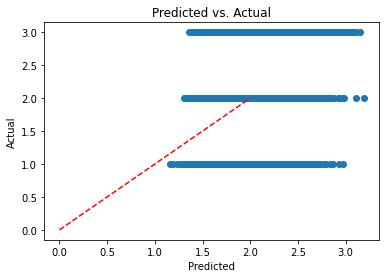

In [44]:

plt.scatter(y_predicted, y_test)

x_line = range(0,3)
y_line = range(0,3)
plt.plot(x_line, y_line, color='r', linestyle='dashed')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual')
plt.show()

In [43]:

mean_absolute = np.mean(np.abs((np.array(y_predicted) - np.array(y_test))))

print('Mean absolute error: '+str(mean_absolute))


root_mean = np.sqrt(np.mean((np.array(y_predicted) - np.array(y_test)) ** 2))
print('Root Mean Squared Error: ' + str(root_mean))



r2= r2_score(y_predicted, y_test)
print('r2: ' + str(r2)) 

Mean absolute error: 0.6881546020926542
Root Mean Squared Error: 0.7901209645898091
r2: -5.6369277063087


In [47]:
toets_model = LinearRegression().fit(X,y)
y_pred = toets_model.predict(X)
display(r2_score(y,y_pred))

0.13228068974234408

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import iqr, shapiro
from scipy import stats
import statistics

In [54]:
X = df_eind.drop("score", axis=1)
y = df_eind['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
titanic_model = LogisticRegression(random_state = 42)
titanic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [55]:
display(titanic_model.score(X_test, y_test))


0.5193225558121632

In [56]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=8, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)
# Iedere fold heef

[0.11990181 0.11883245 0.13777459 0.14072636 0.1311772  0.11733835
 0.14412629 0.13932722]


In [57]:
mean_cv = np.mean(cv_results)
std_cv = np.std(cv_results)
display(mean_cv, std_cv)

0.13115053413340932

0.01024602925642565

In [62]:
predictors = pd.DataFrame()
z = 0
for x in ls:
    predictors['x^3'] = df_eind[x] **3
    predictors['x^2'] = df_eind[x] **2
    predictors['x'] = df_eind[x]
    target = df_eind['score']
    
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.25, random_state = 42)
    qol_model = LinearRegression().fit(x_train,y_train)
    
    y_predicted = qol_model.predict(x_test)
    r2_test = r2_score(y_test, y_predicted)
    display(f'Verklaarde variantie: {r2_test}')


'Verklaarde variantie: 0.09568098217485776'

'Verklaarde variantie: 0.09991008982788918'

'Verklaarde variantie: 0.11369624885984075'

'Verklaarde variantie: 0.09254964078730255'

'Verklaarde variantie: 0.10839993725050812'

'Verklaarde variantie: 0.09116370189203549'

'Verklaarde variantie: 0.07602199559620304'

'Verklaarde variantie: 0.11376567202340337'

'Verklaarde variantie: 0.08414559702091706'

'Verklaarde variantie: 0.08621984997133991'

'Verklaarde variantie: 0.04465305923695462'

'Verklaarde variantie: 0.046854748293197135'

'Verklaarde variantie: 0.09466007412602262'

'Verklaarde variantie: 0.10133667090217913'

In [64]:
from sklearn.linear_model import Ridge
scores = []
coef = {}
alphas = [0.1, 1, 10, 15, 30, 50, 100, 300, 500, 1000]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)    
    y_pred = ridge.predict(X_test)    
    scores.append(ridge.score(X_test, y_test))
    coef[alpha] = ridge.coef_
test = pd.DataFrame.from_dict(coef)
test.index = X.columns

test1 = pd.DataFrame(scores).T
test1.columns = alphas
test1.index = ['scores']

df = pd.concat([test, test1], axis = 0 )
df

,0.1,1.0,10.0,15.0,30.0,50.0,100.0,300.0,500.0,1000.0
crossing,-0.006924,-0.006924,-0.006921,-0.006919,-0.006913,-0.006906,-0.006888,-0.006816,-0.006745,-0.006570
finishing,0.012397,0.012397,0.012396,0.012395,0.012393,0.012391,0.012384,0.012356,0.012329,0.012262
short_passing,0.014807,0.014807,0.014807,0.014807,0.014807,0.014807,0.014807,0.014806,0.014803,0.014791
volleys,-0.003018,-0.003018,-0.003016,-0.003016,-0.003014,-0.003011,-0.003004,-0.002976,-0.002949,-0.002881
dribbling,0.002569,0.002569,0.002574,0.002576,0.002584,0.002594,0.002619,0.002718,0.002813,0.003041
curve,0.005852,0.005852,0.005851,0.005851,0.005849,0.005848,0.005844,0.005828,0.005813,0.005776
free_kick_accuracy,-0.008543,-0.008543,-0.008542,-0.008541,-0.008538,-0.008535,-0.008527,-0.008495,-0.008463,-0.008385
ball_control,0.025924,0.025923,0.025914,0.025909,0.025893,0.025872,0.025821,0.025620,0.025423,0.024956
acceleration,0.006898,0.006898,0.006897,0.006897,0.006897,0.006897,0.006896,0.006893,0.006889,0.006881
agility,0.002586,0.002586,0.002586,0.002586,0.002586,0.002586,0.002587,0.002587,0.002587,0.002590


In [65]:
from sklearn.linear_model import Lasso
scores = []
coef = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)    
    las_pred = lasso.predict(X_test)    
    scores.append(lasso.score(X_test, y_test))
    coef[alpha] = lasso.coef_
test = pd.DataFrame.from_dict(coef)
test.index = X.columns

test1 = pd.DataFrame(scores).T
test1.columns = alphas
test1.index = ['scores']

df = pd.concat([test, test1], axis = 0 )
df

,0.1,1.0,10.0,15.0,30.0,50.0,100.0,300.0,500.0,1000.0
crossing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
finishing,0.003348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
short_passing,0.008193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
volleys,0.000000,0.004263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dribbling,0.008541,0.002942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
curve,0.000963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
free_kick_accuracy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ball_control,0.027641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
acceleration,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
agility,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
display(predictions)

array([1, 1, 3, ..., 3, 3, 3], dtype=int64)

In [68]:
comp = pd.DataFrame(y_test)
comp['predictions'] = predictions
comp['dif'] = comp['score'] - comp['predictions']
dif = comp.groupby('dif')[['predictions']].count()
display(dif)
correct = dif.loc[0]
total = len(comp)
accuracy = correct / total
accuracy

,predictions
dif,
-2,606
-1,1007
0,2801
1,1133
2,948


predictions    0.431255
Name: 0, dtype: float64

In [78]:
knn = KNeighborsClassifier(n_neighbors = 28)
knn.fit(X_train, y_train)
print("accuracy train set:", knn.score(X_train, y_train))
print("accuracy test set:", knn.score(X_test, y_test))

accuracy train set: 0.5332067337302402
accuracy test set: 0.49361046959199384


In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(80, 101)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
display(train_accuracies, test_accuracies)

In [89]:
max_value = max(test_accuracies.values())

print(max_value)

0.5108545034642032


In [ ]:
max_value = max(test_accuracies.values())

print(max_value)

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()